In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style = "whitegrid")

In [2]:
df = pd.read_csv("data/data.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



Since we need to predict Sales for each product at a particular outlet.

Here's the plan
1. Exploratory data analysis
2. Outlier Detection
3. Impute missing values
4. Correlation plot
5. Standardization of data
6. Modelling

Firstly, we need to filter data for one item and outlet. Build the model on top of it.


In [3]:
items = df.Item_Type.unique().tolist()
items

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

In [4]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
content_type = {
    "Low Fat": "Low Fat",
    "Regular": "Regular",
    "low fat": "Low Fat",
    "Lf": "Low Fat",
    "reg": "Regular"
}
df.Item_Fat_Content.replace(to_replace=content_type, inplace=True)

#### Data - Visulaizations

/var/folders/xf/_6m_tb052fn5p84tlt773rqr0000gn/T/ipykernel_981/2663209424.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Item_Weight)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

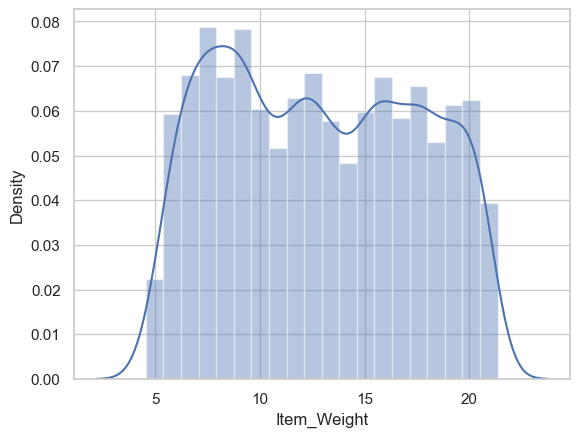

In [6]:
sns.distplot(df.Item_Weight)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Identifier'>

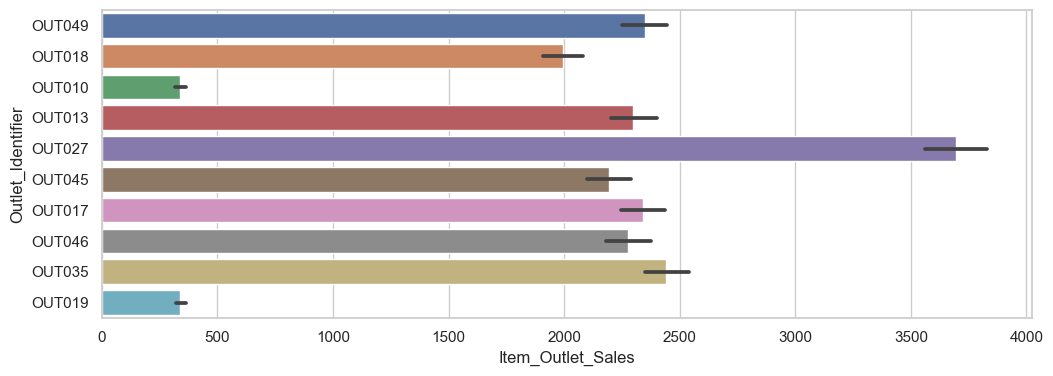

In [7]:
plt.figure(figsize=(12, 4))
sns.barplot(x = "Item_Outlet_Sales", y="Outlet_Identifier", data=df)

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x = "Item_Outlet_Sales", y="Outlet_Location_Type", data=df)

In [ ]:
plt.figure(figsize=(12, 4))
df.groupby(['Outlet_Type']).agg({"Item_Outlet_Sales": "sum"}).plot(kind="bar")

In [ ]:
figure, ax = plt.subplots(figsize=(12, 4))
ax = sns.violinplot(x= "Item_Type", y="Item_Outlet_Sales", data=df)
ax.set_xticklabels(labels = df['Item_Type'].unique(), rotation=45)

In [ ]:
plt.figure(figsize=(12, 4))
sns.violinplot(x="Outlet_Size", y="Item_Outlet_Sales", data=df)

In [ ]:
fig, ax = plt.subplots(figsize= (12, 4))
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", data=df)

In [ ]:
avg_mrp = df.Item_MRP.mean()
figure, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="Item_Type", data=df)
ax.set_xticklabels(labels= df.Item_Type.unique(), rotation=45)
ax.set_ylabel(ylabel="ItemType Count")
ax.axhline(y=avg_mrp, linewidth=1, color='r')

In [ ]:
figure, ax = plt.subplots(figsize=(12, 3))
sns.countplot(x=df.Outlet_Size, data=df)
ax.axhline(y=df.Item_Outlet_Sales.mean(), color='r')

In [ ]:
figure, ax = plt.subplots(figsize=(12, 3))
sns.countplot(x = "Item_Fat_Content", data=df)
ax.axhline(y=df.Item_Outlet_Sales.mean(), color='r')

#### Data - Preprocessing

In [ ]:
df.isnull().sum()/ len(df)

In [ ]:
df.dtypes

In [ ]:
num_cols=df.columns[df.dtypes == 'float64']
cat_cols = df.columns[df.dtypes == "object"]

In [ ]:
num_cols

In [ ]:
cat_cols

In [ ]:
def labelencoding(df: pd.DataFrame) -> pd.DataFrame:
    try:
        for x in df.columns:
            if x in df.select_dtypes(include="object"):
                df[x] = df[x].astype('category').cat.codes
        return df
    except Exception as e:
        print(e)
        print("Encoding error")

In [ ]:
df = labelencoding(df)
df.head()

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_num_col(df: pd.DataFrame, target_col: str) ->pd.DataFrame:
    num_df = df.select_dtypes(exclude="object").drop(target_col, axis=1)
    num_cols = num_df.columns
    scaled_df= pd.DataFrame(StandardScaler().fit_transform(num_df), columns=num_df.columns)
    new_df = df.drop(num_cols, axis=1)
    return pd.concat([new_df, scaled_df], axis=1)


In [ ]:
ndf = scale_num_col(df=df, target_col='Item_Outlet_Sales')
ndf.head()

In [ ]:


num_df = df.select_dtypes(include="float64")
scaled_df = pd.DataFrame(StandardScaler().fit_transform(num_df), columns=num_df.columns)

In [ ]:
scaled_df

In [ ]:
df.head()

In [ ]:
df = labelencoding(df=df)

In [ ]:
df.head()

In [ ]:
df.Item_Identifier.astype('category').cat.codes

In [ ]:
df.Outlet_Identifier.unique()